In [2]:
# -*- coding: utf-8 -*-


In [3]:
#@author: Lalith Bharadwaj
#"""

oading Essestial Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
import matplotlib.patches as mpatches

inding the Slope of linear regression line

In [5]:
def Slope(a,b):
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    slope=(n*two_sum-sumX*sumY)/(n*sumX_2-(sumX)**2)
    return slope

inding Intercept of linear regression line

In [6]:
def Intercept(a,b):
    intercept=np.mean(b)-Slope(a,b)*np.mean(a)
    return intercept

redictions are made with the help of linear regression algorithm

In [7]:
def Predictions(slope,x_input,intercept):
    predict=slope*x_input + intercept
    return predict

-squared is regression metric

In [8]:
def R_squared(predicted_values,test_values):
    f=predicted_values
    y=test_values
    print(f,'\n\n',y)
    #sum of squares
    ss_total=np.sum((y-np.mean(y))**2)
    #regression sum
    #ss_reg=np.sum((f-np.mean(y))**2)
    #Residuals sum of squares
    ss_res=np.sum((y-f)**2)
    #R-squared formula
    R_2=1-(ss_res/ss_total)
    return R_2

inding Correlation Coefficient for the given X & Y values

In [9]:
def correlation_coeff(predicted_values,test_values):
    a=predicted_values
    b=test_values
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    sumY_2=np.sum(b**2)
    score=(n*two_sum-sumX*sumY)/np.sqrt((n*sumX_2-(sumX)**2)*(n*sumY_2-(sumY)**2))
    return score

inding Covariance for the given X & Y values

In [11]:
def Covariance(X,Y):
    a=X
    b=Y
    n=len(a)
    two_sum=np.sum(a*b)
    cov=two_sum/n-np.mean(a)*np.mean(b)
    return cov
     
#Importing data(csv format) using pandas 
#Replace another dataset to make predictions
dataset=pd.read_csv(r"C:\Users\Sai Teja\Desktop\python\New folder\Salary_Data.csv") 

Split-out validation dataset<br>
nowing the dimenstions of data and making them READY for PREDICTIONS.

In [12]:
array = dataset.values
X = array[:,0]
#print(X.shape)
#X=X.reshape(1,-1).T
print(X.shape)
Y = array[:,1]
print(Y.shape)

(30,)
(30,)


o know the distribution of data let us plot box plot<br>
 1

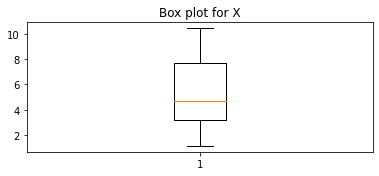

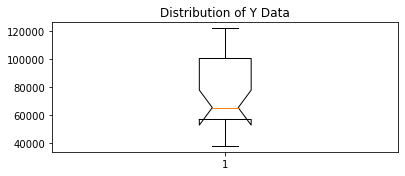

In [13]:
left = 0.1
width = 0.8
#fig=plt.figure()
#fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=True)
ax1 = plt.axes([left, 0.5, width, 0.45])
ax1.boxplot(X)
ax1.set_title('Box plot for X')
plt.show()
## 2
ax2 = plt.axes([left, 0.5, width, 0.45])
ax2.boxplot(Y, '.-')
ax2.set_title('Distribution of Y Data')
plt.show()

ovariation in data

In [14]:
print(Covariance(X,Y))

73569.4266666667


ividing data into training and testing classes

In [15]:
test_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size= test_size, random_state=seed)

inding intercepts of rgression line

In [16]:
intercept=Intercept(X_train,Y_train)
slope=Slope(X_train,Y_train)
print(intercept,slope)
predictions=Predictions(slope=slope,x_input=X_validation,intercept=intercept)
print(predictions)
print(R_squared(predicted_values=predictions,test_values=Y_validation))
print(correlation_coeff(test_values=Y_validation,predicted_values=predictions))

24525.04300166155 9589.490012922264
[38909.27802104 75349.34007015 36991.38001846]
[38909.27802104 75349.34007015 36991.38001846] 

 [37731. 83088. 46205.]
0.8743350638929306
0.975680209596182


quation of Linear Regression

In [17]:
y=slope*X+intercept

lotting the linear regression function

ValueError: 'R' is not a valid value for color

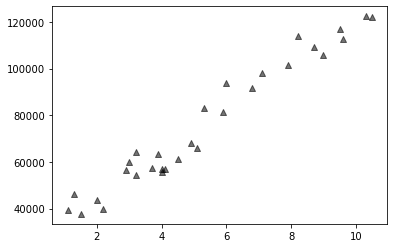

In [18]:
plt.scatter(X,Y,marker='^',color='k',alpha=0.55)
plt.plot(X,y,color='R',linewidth=2)
red_patch = mpatches.Patch(color='red', label='Regression Line')
plt.legend(loc=0,handles=[red_patch])
plt.title('Linear Regression Plot')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

esidual plots

C:\Users\Sai Teja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


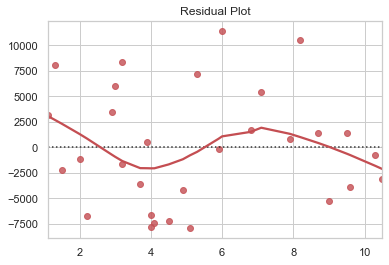

In [19]:
sns.set(style="whitegrid")
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#Plot the residuals after fitting a linear model
sns.residplot(X, Y, lowess=True, color="r")
plt.title('Residual Plot')
plt.show()

-------------------------------------------------------------#